# PCA Homework

## 1. Preparation and Libraries


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

rand_state=289456
np.random.seed(rand_state)

## 2. Exercise 1 (Loading and Preparing the Data)

In [2]:
# (a) Load the CSV file into a DataFrame
df_tot = pd.read_csv('cla4lsp_bikez_curated.csv')
print(f"Shape of the original dataset: {df_tot.shape}")

# (b) Select a random integer between 0, 1, and 2
r = random.randint(0, 2)

# (b) Create a sub-DataFrame (workdf) containing data corresponding to years with a remainder of r when divided by three
workdf = df_tot[df_tot['Year'] % 3 == r]

# (c) Define the labels and features columns
labels = ['Brand', 'Model', 'Year', 'Category', 'Rating']
features = [col for col in df_tot.columns if col not in labels]

# Select and Remove two random columns from the features
columns_to_remove = random.sample(['Front brakes','Rear brakes','Front tire','Rear tire','Front suspension','Rear suspension'], 2)
print(f"Columns to be removed: {columns_to_remove}")
# Columns to be removed: ['Front tire', 'Rear suspension']
features = list(filter(lambda i: i not in columns_to_remove, features))
workdf = workdf.drop(columns=columns_to_remove)
print(f"Shape of the workdf dataset: {workdf.shape}")
print(len(features))

Shape of the original dataset: (38472, 27)
Columns to be removed: ['Rear tire', 'Front brakes']
Shape of the workdf dataset: (13673, 25)
20


In [3]:
# 'Unspecified category', 'Not Given/Unknown', 'not given/unknown'
# make the null vals of categorical columns recognizable by pandas
null_values=['Unspecified category', 'Not Given/Unknown', 'not given/unknown']
workdf.replace(null_values,np.nan,inplace=True)


In [4]:
# A dataframe to show info about the workdf dataset
def df_info(df:pd.DataFrame)->pd.DataFrame:
    tmp=pd.DataFrame()
    tmp["Null Percentage"]=100*df.isnull().sum()/len(df)
    tmp["Null Count"]=df.isnull().sum()
    tmp["Non-Null Count"]=df.count()
    tmp["Distinct Count"]=df.nunique()
    tmp["DType"]=df.dtypes
    tmp["Categorical"] = [df[clmn].dtype == 'object' and len(df[clmn].unique()) < len(df) for clmn in df.columns]
    tmp.sort_values(by='Null Percentage', ascending=False, inplace=True)
    return tmp

In [5]:
df_info(workdf)

,Null Percentage,Null Count,Non-Null Count,Distinct Count,DType,Categorical
Torque (Nm),56.549404,7732,5941,592,float64,False
Rating,46.522343,6361,7312,29,float64,False
Fuel control,43.377459,5931,7742,14,object,True
Dry weight (kg),41.914722,5731,7942,979,float64,False
Seat height (mm),36.992613,5058,8615,333,float64,False
Wheelbase (mm),33.006655,4513,9160,582,float64,False
Rear suspension,32.582462,4455,9218,12,object,True
Power (hp),32.582462,4455,9218,595,float64,False
Front suspension,31.368390,4289,9384,7,object,True
Fuel system,26.351203,3603,10070,7,object,True


Data Cleaning:
1) dropping columns with high null
2) correaltion
3) remove cols with low % of nulls
3) removing rows with 50% null


In [6]:
# 01
workdf.drop(columns=['Torque (Nm)'],inplace=True)
features.remove('Torque (Nm)')
workdf.shape

(13673, 24)

In [7]:
categorical_columns_list=[clmn for clmn in workdf.columns if workdf[clmn].dtype == 'object' and clmn not in labels]
numerical_columns_list=[clmn for clmn in workdf.columns if clmn not in categorical_columns_list and clmn not in labels]

print(f"Numerical columns: {numerical_columns_list}")
print(f"Categorical columns: {categorical_columns_list}")

Numerical columns: ['Displacement (ccm)', 'Power (hp)', 'Bore (mm)', 'Stroke (mm)', 'Fuel capacity (lts)', 'Dry weight (kg)', 'Wheelbase (mm)', 'Seat height (mm)']
Categorical columns: ['Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel control', 'Cooling system', 'Transmission type', 'Fuel system', 'Rear brakes', 'Front tire', 'Front suspension', 'Rear suspension']


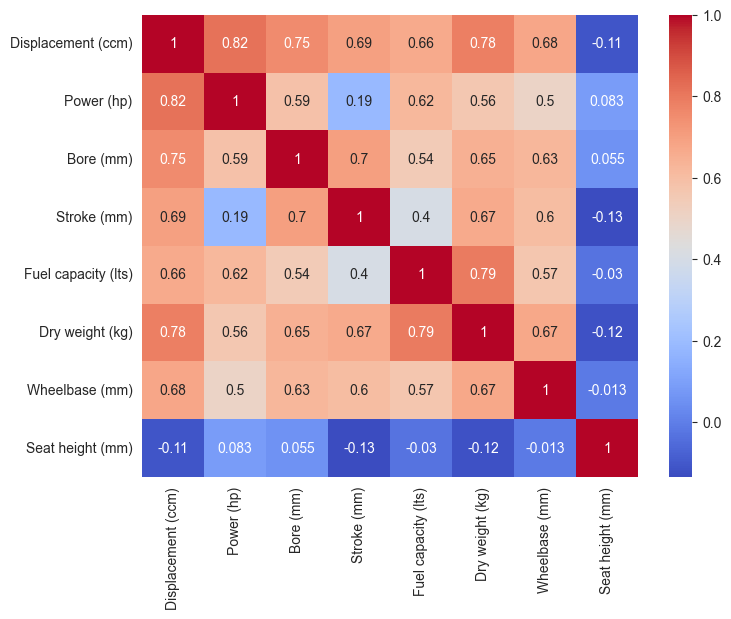

In [8]:
correlation_matrix=workdf[numerical_columns_list].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()
# workdf[numerical_columns_list].head()

In [9]:
# Set a correlation threshold
correlation_threshold = 0.7

# Set the specific column of interest
specific_column = "Displacement (ccm)"
# correlated_columns=set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
#             colname_i = correlation_matrix.columns[i]
#             colname_j = correlation_matrix.columns[j]
            
#             print(colname_i," - ",colname_j," : ",correlation_matrix.iloc[i, j])
#             print("----------")
            
#             correlated_columns.add(colname_i)
#             correlated_columns.add(colname_j)   
# Identify highly correlated columns to the specific column
highly_correlated_columns = correlation_matrix[specific_column][(abs(correlation_matrix[specific_column]) > correlation_threshold) & (correlation_matrix[specific_column].index != specific_column)].index.tolist()
print(f'Columns with higher than {correlation_threshold} correlation with {specific_column} : {highly_correlated_columns}')

numerical_columns_list = list(filter(lambda i: i not in highly_correlated_columns, numerical_columns_list))

features = list(filter(lambda i: i not in highly_correlated_columns, features))
# Drop the highly correlated columns
workdf_dropped = workdf.drop(highly_correlated_columns, axis=1)
workdf_dropped.shape

Columns with higher than 0.7 correlation with Displacement (ccm) : ['Power (hp)', 'Bore (mm)', 'Dry weight (kg)']


(13673, 21)

In [10]:
numerical_columns_list


['Displacement (ccm)',
 'Stroke (mm)',
 'Fuel capacity (lts)',
 'Wheelbase (mm)',
 'Seat height (mm)']

In [11]:
# 3. remove rows with cols which has low % of nulls
# should i do it?

In [12]:
# 4. remove rows that have 50% of columns as null
workdf_dropped.dropna(thresh=workdf_dropped.shape[1]/2, inplace=True)

In [13]:
workdf_dropped.shape

(13496, 21)

In [14]:
workdf_stat=pd.DataFrame()
workdf_stat['skew']=workdf_dropped[numerical_columns_list].skew()
workdf_stat['kurtosis']=workdf_dropped[numerical_columns_list].kurtosis()
workdf_stat['Mean']=workdf_dropped[numerical_columns_list].mean()
workdf_stat['STD']=workdf_dropped[numerical_columns_list].std()

workdf_stat



,skew,kurtosis,Mean,STD
Displacement (ccm),2.990437,23.375779,546.462181,539.568813
Stroke (mm),1.753834,20.862145,64.592883,18.438268
Fuel capacity (lts),0.423434,0.419390,13.077054,6.026599
Wheelbase (mm),0.300940,3.190720,1417.837903,170.446251
Seat height (mm),28.803370,1442.618982,791.628694,134.441156


Based on the provided data:

*Displacement (ccm):*
Skewness = 2.985938 (positive)  
Kurtosis = 24.641551 (positive)  
Interpretation: The distribution of Displacement (ccm) is likely right-skewed (positively skewed) and has heavier tails than a normal distribution (leptokurtic). **It is not normally distributed.**   

*Fuel capacity (lts):*  
Skewness = 0.398549 (close to 0)  
Kurtosis = 0.703285 (close to 0)  
Interpretation: The distribution of Fuel capacity (lts) is approximately symmetric and has tails similar to a normal distribution (mesokurtic). **It is approximately normally distributed.**  

*Wheelbase (mm):*  
Skewness = 0.729586 (positive)  
Kurtosis = 4.747603 (positive)  
Interpretation: The distribution of Wheelbase (mm) is slightly right-skewed (positively skewed) and has heavier tails than a normal distribution (leptokurtic). **It is not normally distributed.**  

*Seat height (mm):*  
Skewness = -0.153437 (negative)  
Kurtosis = 1.013157 (close to 0)  
Interpretation: The distribution of Seat height (mm) is approximately symmetric and has tails similar to a normal distribution (mesokurtic). **It is approximately normally distributed.**  

### Methods for Predicting Nulls in Not Normally Distributed Data

| Method | Advantages | Disadvantages |
|:------:|:----------:|:-------------:|
| Mean imputation | Simple and easy to implement | Can introduce bias into the data |
| Median imputation | Less biased than mean imputation | Can introduce bias if the distribution of the data is skewed |
| KNN imputation | More accurate than mean or median imputation | More complex to implement |
| Bayesian imputation | Most accurate of the methods listed | Most complex to implement |

### Methods for Predicting Nulls in Normally Distributed Data

| Method | Advantages | Disadvantages |
|:------:|:----------:|:-------------:|
| Mean imputation | Simple and easy to implement | Can introduce bias into the data if the distribution of the data is not perfectly normally distributed |
| Median imputation | Less biased than mean imputation | Can introduce bias if the distribution of the data is skewed |


In [15]:
not_normally_distributed=["Displacement (ccm)","Wheelbase (mm)"] #"Stroke (mm)"
normally_distributed=["Fuel capacity (lts)","Seat height (mm)"]


# Impute null values using KNNImputer
# knn_imputer = KNNImputer(n_neighbors=3)
# workdf_imputed = pd.DataFrame(knn_imputer.fit_transform(workdf_dropped[not_normally_distributed]),columns=not_normally_distributed).reset_index(drop=True)
# tmpDf=pd.DataFrame(workdf_dropped[normally_distributed].fillna(workdf_dropped[normally_distributed].median()),columns=normally_distributed).reset_index(drop=True)
# workdf_imputed=pd.concat([workdf_imputed,tmpDf],axis=1)
# workdf_imputed.isnull().sum()

# Create KNNImputer instance
knn_imputer = KNNImputer(n_neighbors=3)

# Impute the columns specified in not_normally_distributed
workdf_dropped[not_normally_distributed] = knn_imputer.fit_transform(workdf_dropped[not_normally_distributed])

# Fill the columns specified in normally_distributed with median values
workdf_dropped[normally_distributed] = workdf_dropped[normally_distributed].fillna(workdf_dropped[normally_distributed].median())

# Check for any remaining missing values in the DataFrame
workdf_dropped[features].isnull().sum()

Displacement (ccm)        0
Engine cylinder           1
Engine stroke             1
Gearbox                1738
Stroke (mm)            3196
Fuel capacity (lts)       0
Fuel control           5765
Cooling system         1355
Transmission type      1649
Wheelbase (mm)            0
Seat height (mm)          0
Fuel system            3455
Rear brakes             442
Front tire                0
Front suspension       4117
Rear suspension        4281
dtype: int64

In [16]:
df_info(workdf_dropped[categorical_columns_list])


,Null Percentage,Null Count,Non-Null Count,Distinct Count,DType,Categorical
Fuel control,42.716360,5765,7731,14,object,True
Rear suspension,31.720510,4281,9215,12,object,True
Front suspension,30.505335,4117,9379,7,object,True
Fuel system,25.600178,3455,10041,7,object,True
Gearbox,12.877890,1738,11758,14,object,True
Transmission type,12.218435,1649,11847,3,object,True
Cooling system,10.040012,1355,12141,3,object,True
Rear brakes,3.275044,442,13054,52,object,True
Engine cylinder,0.007410,1,13495,20,object,True
Engine stroke,0.007410,1,13495,9,object,True


# Exercise 2 (Encoding of Categorical Data)

In "Front suspension" column we have 'telescopic fork' and 'telescopic forks' 
which are pretty similar.
so we find all telescopic forks and replace them with telescopic fork.

In [17]:
if 'Front suspension' in workdf_dropped.columns:
    workdf_dropped['Front suspension'] = workdf_dropped['Front suspension'].replace('telescopic forks', 'telescopic fork')
else:
    print('Front suspension was removed before')

we change all nans to "nans" so it would be easier to do one hot manually on them

In [18]:
workdf_dropped[categorical_columns_list]=workdf_dropped[categorical_columns_list].fillna("nan")

In [19]:
def extract_parts(input_value) -> list:
    extracted_parts=[]
    
    if isinstance(input_value, np.ndarray):
        # Split the text based on either a comma or a period
        parts = [re.split(r'[,.]', item) for item in input_value]
        # Remove any leading/trailing whitespace from the extracted parts
        extracted_parts = [part.strip() for sublist in parts for part in sublist if part.strip()]
    elif isinstance(input_value, str):
        # Split the text based on either a comma or a period
        parts = re.split(r'[,.]', input_value)
        # Remove any leading/trailing whitespace from the extracted parts
        extracted_parts = [part.strip() for part in parts]
    else:
        pass
    return list(set(extracted_parts))
        

finding which cols follow the rule of the hint

In [20]:
import re
# regex: bool, default True If True, assumes the pat is a regular expression.
#              If False, treats the pat as a literal string.

# case: bool, default True If True, case sensitive.
workdf_dropped_copy=workdf_dropped.copy()
for col in categorical_columns_list:
    if workdf_dropped[col].str.contains('[,\.]', case=False,regex=True).any():
        col_content=extract_parts(workdf_dropped[col].unique())
        temp_df=pd.DataFrame(0, index=workdf_dropped.index, columns=col_content)
        
        # Performing the one-hot encoding manually for the columns that are list of characteristics
        for idx, row in workdf_dropped.iterrows():
            row_content=extract_parts(row[col])
            temp_df.loc[idx, row_content] = 1
        temp_df=temp_df.add_prefix(col+"_")
        workdf_dropped = pd.concat([workdf_dropped.drop(col, axis=1), temp_df], axis=1)
        
    else:
        col_content = workdf_dropped[col].unique()
        # Perform one-hot encoding
        one_hot_encoded=pd.get_dummies(workdf_dropped[col],prefix=col, dummy_na=False)
        # Add one-hot encoded columns to the original DataFrame and drop the original "Category" column
        workdf_dropped = pd.concat([workdf_dropped.drop(col, axis=1), one_hot_encoded], axis=1)

# workdf_dropped=workdf_dropped_copy.copy()


Creating the sub-DF named Xworkdf

In [21]:
workdf_dropped.shape

(13496, 121)

In [22]:
Xworkdf=workdf_dropped.drop(columns=labels, axis=1).copy()
     

# Exercise 3 (Preprocessing and PCA)
create 2 DFs Xworkdf_std and Xworkdf_mm, created using a StandardScaler and a
MinMaxScaler (min = 0, max = 1), respectively, applied to Xworkdf.

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# creating DFs
Xworkdf_std = Xworkdf.copy()
Xworkdf_mm = Xworkdf.copy()

Xworkdf_std[numerical_columns_list] = std_scaler.fit_transform(Xworkdf[numerical_columns_list])
Xworkdf_mm[numerical_columns_list] = minmax_scaler.fit_transform(Xworkdf[numerical_columns_list])

analyze and comment a comparison of the variances of Xworkdf with the variances
of Xworkdf std and Xworkdf mm, with a special focus on the non-categorical features.

In [24]:
original_df_var=Xworkdf[numerical_columns_list].var()
std_df_var=Xworkdf_std[numerical_columns_list].var()
mm_df_var=Xworkdf_mm[numerical_columns_list].var()

In [25]:
print("Original data variance:")
print(original_df_var)
print('----------')
print("Standard Scalered data variance:")
print(std_df_var)
print('----------')
print("MinMax Scalered data variance:")
print(mm_df_var)

Original data variance:
Displacement (ccm)     287474.488104
Stroke (mm)               339.969740
Fuel capacity (lts)        29.829212
Wheelbase (mm)          25322.669995
Seat height (mm)        11509.582097
dtype: float64
----------
Standard Scalered data variance:
Displacement (ccm)     1.000074
Stroke (mm)            1.000097
Fuel capacity (lts)    1.000074
Wheelbase (mm)         1.000074
Seat height (mm)       1.000074
dtype: float64
----------
MinMax Scalered data variance:
Displacement (ccm)     0.004302
Stroke (mm)            0.001616
Fuel capacity (lts)    0.012174
Wheelbase (mm)         0.008138
Seat height (mm)       0.000207
dtype: float64


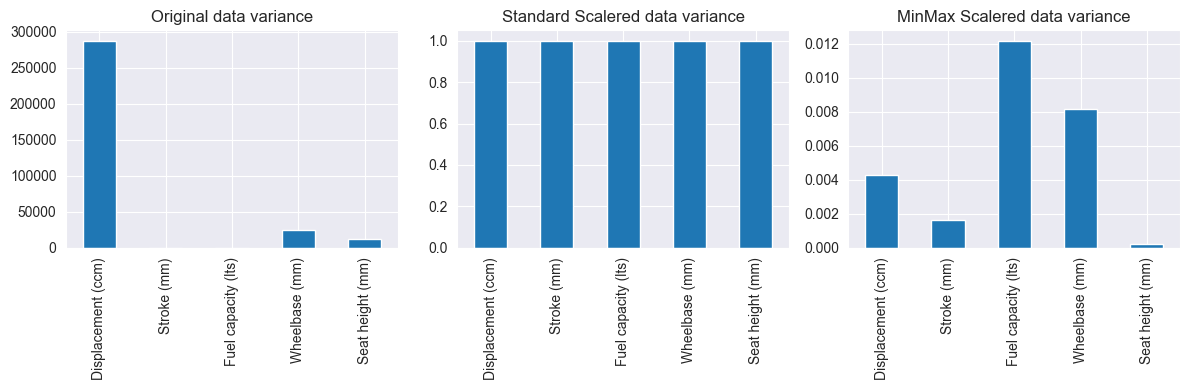

In [26]:
data={
    "Original data variance":original_df_var,
    "Standard Scalered data variance":std_df_var,
    "MinMax Scalered data variance":mm_df_var
}
df = pd.DataFrame(data)
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 4))

# Plot each variable
for i, col in enumerate(df.columns):
    df[col].plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Observation & Inference
 - _Original Variance_:
<br>
The variance of the original data is the highest, as indicated by the largest values among the three.
<br>
This is expected because the original data contains values at their original scales.
<br>
<br>
 - _Standard Scaler Variance_:
<br>
The variance after applying the StandardScaler is very close to 1 for all variables.
<br>
This indicates that the data has been standardized to have zero mean and unit variance.
<br>
StandardScaler scales the data such that each feature has a mean of 0 and a standard deviation of 1.
<br>
The fact that the variances are close to 1 suggests that the features have been standardized and now have a similar scale.
<br>
<br>
 - _MinMax Scaler Variance_:
<br>
The variance after applying the MinMaxScaler is smaller than 1 for all variables.
<br>
MinMaxScaler scales the data to a specific range, usually [0, 1], based on the minimum and maximum values in the original data.<br>
The fact that the variances are smaller than 1 indicates that the features have been scaled to a smaller range.

## Full PCA (no dimensionality reduction)

In [27]:
from sklearn.decomposition import PCA


# Apply PCA with no dimensionality reduction
pca = PCA(n_components=Xworkdf.shape[1])

Xworkdf_pca = pca.fit_transform(Xworkdf)
cum_exp_var = np.insert(np.cumsum(pca.explained_variance_ratio_),0,0)
pca_components = pca.components_

Xworkdf_std_pca = pca.fit_transform(Xworkdf_std)
std_cum_exp_var = np.insert(np.cumsum(pca.explained_variance_ratio_),0,0)
pca_components = pca.components_

Xworkdf_mm_pca = pca.fit_transform(Xworkdf_mm)
mm_cum_exp_var = np.insert(np.cumsum(pca.explained_variance_ratio_),0,0)
pca_components = pca.components_


plt.plot(cum_exp_var, label='Original')
plt.plot(std_cum_exp_var, label='Standard Scaler')
plt.plot(mm_cum_exp_var, label='MinMax Scaler')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

__Original Data__: The cumulative explained variance for the original data starts at 0.94 and rapidly increases as you include more principal components.<br><br>
__StandardScaler Data__: The cumulative explained variance for the data after applying StandardScaler starts at a lower value (around 0.24) compared to the original data. This is because StandardScaler centers the data around zero and scales it, resulting in a lower variance<br><br>
__MinMaxScaler Data__: Similar to StandardScaler, the cumulative explained variance for the data after applying MinMaxScaler starts at a lower value (around 0.17) compared to the original data. MinMaxScaler scales the data to a specific range (usually 0 to 1), which reduces the variance. 
<br><br>
The cumulative explained variance measures how much of the total variance in the data is captured by including a certain number of principal components. For all three versions of the data, as you include more principal components, the cumulative explained variance increases and eventually reaches 1.This means that by using all principal components, you can recover the original variance of the data. However, the pace of increase in the cumulative explained variance differs for the different scaling methods.

# Exercise 4 (Dimensionality Reduction and Interpretation of the PCs)

In [ ]:
std_min_num_pcs = min(np.where(std_cum_exp_var >= 0.35)[0][0],5)
print("the minimum number of PCs that explains 35% of the total variance")
print("for Standard Scaler is: ",std_min_num_pcs)
mm_min_num_pcs = min(np.where(mm_cum_exp_var >= 0.35)[0][0],5)
print("for MinMax Scaler is: ",mm_min_num_pcs)


In [ ]:
# Apply PCA for Standard Scaler
pca_std = PCA(n_components=std_min_num_pcs)
Xworkdf_std_pca_m = pca_std.fit_transform(Xworkdf_std)

# Apply PCA for MinMax Scaler
pca_mm = PCA(n_components=mm_min_num_pcs)
Xworkdf_mm_pca_m = pca_mm.fit_transform(Xworkdf_mm)

# Create bar plots for explained variance
plt.figure(figsize=(12, 6))

# Bar plot for Standard Scaler
plt.subplot(1, 2, 1)
plt.bar(range(1, std_min_num_pcs + 1), pca_std.explained_variance_ratio_ * 100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Standard Scaler - Explained Variance')
plt.xticks(range(1, std_min_num_pcs + 1))

# Bar plot for MinMax Scaler
plt.subplot(1, 2, 2)
plt.bar(range(1, mm_min_num_pcs + 1), pca_mm.explained_variance_ratio_ * 100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('MinMax Scaler - Explained Variance')
plt.xticks(range(1, mm_min_num_pcs + 1))

plt.tight_layout()
plt.show()

### Interpretation

In [ ]:
# For Standard Scaler
interpretation_data = []

for component_idx in range(std_min_num_pcs):
    loading = pca_std.components_[component_idx]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(loading)), loading)
    plt.xticks(range(len(loading)), Xworkdf_std.columns, rotation=90,fontsize=5, ha="right")
    plt.title(f"PC {component_idx+1} - Standard Scaler")
    plt.xlabel("Original Features")
    plt.ylabel("Components")
    plt.tight_layout()
    plt.show()
    # Find indices of top 3 highest positive and negative loadings
    top_positive_indices = np.argsort(loading)[-3:][::-1]
    top_negative_indices = np.argsort(loading)[:3]
    
    top_positive_features = [Xworkdf_std.columns[idx] for idx in top_positive_indices]
    top_negative_features = [Xworkdf_std.columns[idx] for idx in top_negative_indices]
    
    interpretation_data.append({
        'Component': f'PC {component_idx+1}',
        'Top Positive Loading Features': ', '.join(top_positive_features),
        'Top Negative Loading Features': ', '.join(top_negative_features)
    })

interpretation_df = pd.DataFrame(interpretation_data)
pd.set_option("display.max_colwidth", None)
display(interpretation_df)


Based on the top 3 positive loading features for PC 1 with Standard Scaler, which are "Displacement (ccm)", "Wheelbase (mm)", and "Fuel capacity (lts)", it seems like this component captures characteristics related to the overall size and capacity of a vehicle. Therefore, you could name this component as "_Vehicle Size and Capacity_".<br>
And for the second PC with Standard Scaler, the proper name seems to be "_Performance-Enhancing Characteristics_"

In [ ]:
# For MinMax Scaler
interpretation_data = []

for component_idx in range(mm_min_num_pcs):
    loading = pca_mm.components_[component_idx]
    plt.figure(figsize=(9, 5))
    plt.bar(range(len(loading)), loading)
    plt.xticks(range(len(loading)), Xworkdf_mm.columns, rotation=90,fontsize=5, ha="right")
    plt.title(f"Principal Component {component_idx+1} - MinMax Scaler")
    plt.xlabel("Original Features")
    plt.ylabel("Components")
    plt.tight_layout()
    plt.show()
    # Find indices of top 3 highest positive and negative loadings
    top_positive_indices = np.argsort(loading)[-3:][::-1]
    top_negative_indices = np.argsort(loading)[:3]
    
    top_positive_features = [Xworkdf_mm.columns[idx] for idx in top_positive_indices]
    top_negative_features = [Xworkdf_mm.columns[idx] for idx in top_negative_indices]
    
    print(f"Principal Component {component_idx+1} - MinMax Scaler:")
    print("Top 3 Highest Positive Loading Features:", top_positive_features)
    print("Top 3 Highest Negative Loading Features:", top_negative_features)
    interpretation_data.append({
        'Component': f'PC {component_idx+1}',
        'Top Positive Loading Features': ', '.join(top_positive_features),
        'Top Negative Loading Features': ', '.join(top_negative_features)
    })

interpretation_df = pd.DataFrame(interpretation_data)
pd.set_option("display.max_colwidth", None)
display(interpretation_df)

For MinMax Scaler PCs, By analyzing the top 3 positive loading features for each Principal Component and suggest names based on those features:

PC1:<br>
Top 3 Highest Positive Loading Features: ['Fuel system_injection', 'Rear brakes_single disc', 'Cooling system_Liquid']<br>
Suggested Name: "_Enhanced Performance System_"<br><br>
PC2:<br>
Top 3 Highest Positive Loading Features: ['Rear suspension_nan', 'Fuel system_nan', 'Engine cylinder_V2']<br>
Suggested Name: "_Advanced Technology Integration_"<br><br>
PC3:<br>
Top 3 Highest Positive Loading Features: ['Cooling system_Liquid', 'Transmission type_Chain', 'Fuel control_nan']<br>
Suggested Name: "_Efficient Power Management_"<br><br>
PC4:<br>
Top 3 Highest Positive Loading Features: ['Front brakes_single disc', 'Transmission type_Belt', 'Gearbox_Automatic']<br>
Suggested Name: "_Optimized Control System_"

### Score Graph

In [ ]:
import matplotlib.pyplot as plt

# Number of PCs to plot
l = 2  # for m==2

# Define the names of the PCs
l_names = [
    "Vehicle Size and Capacity",
    "Performance-Enhancing Characteristics"
]

# Projecting original data onto the principal components
Xworkdf_std_scores = pca_std.transform(Xworkdf_std)
Xworkdf_mm_scores = pca_mm.transform(Xworkdf_mm)

# Plotting for Xworkdf_std
plt.figure(figsize=(10, 6))
plt.scatter(Xworkdf_std_scores[:,0],Xworkdf_std_scores[:,1],alpha=0.3)
plt.title("PCA with Standard Scaler")
plt.xlabel(l_names[0])
plt.ylabel(l_names[1])
plt.show()

l=3 # for m>=3
l_names = [
    "Enhanced Performance System",
    "Advanced Technology Integration",
    "Efficient Power Management"
]
# Plotting for Xworkdf_mm
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xworkdf_mm_scores[:,0],Xworkdf_mm_scores[:,1],Xworkdf_mm_scores[:,2],alpha=0.3)
ax.set_title('PCA with MinMaxScaler')
ax.set_xlabel(l_names[0])
ax.set_ylabel(l_names[1])
ax.set_zlabel(l_names[2])
plt.show()


## Exercise 5 (k-Means)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Filter out FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Range of k values to consider
k_range = range(3, 11)

# For Standard Scaler
silhouette_scores_std = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=289456)
    labels = kmeans.fit_predict(Xworkdf_std_scores[:, :std_min_num_pcs])
    silhouette_scores_std.append(silhouette_score(Xworkdf_std_scores[:, :std_min_num_pcs], labels))

# For MinMax Scaler
silhouette_scores_mm = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=289456)
    labels = kmeans.fit_predict(Xworkdf_mm_scores[:, :mm_min_num_pcs])
    silhouette_scores_mm.append(silhouette_score(Xworkdf_mm_scores[:, :mm_min_num_pcs], labels))
    
# Find the index of the maximum silhouette score
max_idx_std = silhouette_scores_std.index(max(silhouette_scores_std))
max_idx_mm = silhouette_scores_mm.index(max(silhouette_scores_mm))

# Fit k-means clustering models
best_k_std = k_range[max_idx_std]  
best_k_mm = k_range[max_idx_mm] 

print("Best k for Standard Scaler:", best_k_std)
print("Best k for MinMax Scaler:", best_k_mm)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores_std, marker='o', label='Standard Scaler')
plt.plot(k_range, silhouette_scores_mm, marker='o', label='MinMax Scaler')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_range)
plt.legend()



# Annotate the highest silhouette scores with red star markers
plt.annotate('Max Silhouette', (best_k_std, silhouette_scores_std[max_idx_std]),
             xytext=(-40, -20), textcoords='offset points', color='red',
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7', facecolor='red'))

plt.annotate('Max Silhouette', (best_k_mm, silhouette_scores_mm[max_idx_mm]),
             xytext=(-40, -20), textcoords='offset points', color='red',
             arrowprops=dict(arrowstyle='wedge,tail_width=0.7', facecolor='red'))

plt.show()


## Exercise 6 (Clusters and Centroid Interpretation and Visualization)

In [ ]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


kmeans_std = KMeans(n_clusters=best_k_std, random_state=289456)
kmeans_mm = KMeans(n_clusters=best_k_mm, random_state=289456)

clusters_std = kmeans_std.fit_predict(Xworkdf_std_scores)
clusters_mm = kmeans_mm.fit_predict(Xworkdf_mm_scores)

# Get cluster centroids
centroids_std = kmeans_std.cluster_centers_
centroids_mm = kmeans_mm.cluster_centers_

labels_std = kmeans_std.labels_
labels_mm = kmeans_mm.labels_

print(f'The best centroids for Xworkdf_std are:\n{centroids_std}')
print(f'The best centroids for Xworkdf_mm are:\n{centroids_mm}')



In [ ]:
l_names = [
    "Vehicle Size and Capacity",
    "Performance-Enhancing Characteristics"
]

# Plotting for Xworkdf_std
plt.figure(figsize=(10, 6))

# Assuming you have already created the scatter plot of the data points
plt.scatter(Xworkdf_std_scores[:, 0], Xworkdf_std_scores[:, 1], alpha=0.3, label='Data Points')

# Add centroids to the scatter plot
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], marker='X', s=100, c='red', label='Centroids')

# Set labels and title
plt.xlabel(l_names[0])
plt.ylabel(l_names[1])
plt.title("PCA with Standard Scaler")
plt.legend()

plt.show()


In [ ]:
l=3 # for m>=3
l_names = [
    "Enhanced Performance System",
    "Advanced Technology Integration",
    "Efficient Power Management"
]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the desired viewing angle
ax.view_init(elev=20, azim=45)  # Adjust the 'elev' and 'azim' values as needed
ax.scatter(Xworkdf_mm_scores[:,0],Xworkdf_mm_scores[:,1],Xworkdf_mm_scores[:,2],alpha=0.1,label='Data Points')


# Add centroids to the scatter plot
ax.scatter(centroids_mm[:, 0], centroids_mm[:, 1],centroids_mm[:, 2], marker='X', s=100, c='red', label='Centroids')

# Set labels and title
ax.set_title('PCA with MinMaxScaler')
ax.set_xlabel(l_names[0])
ax.set_ylabel(l_names[1])
ax.set_zlabel(l_names[2])
plt.legend()

plt.show()

# Exercise 7 - Optional (Clusters and Centroids Evaluation)

## Internal Evaluation - Silhouette Score
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a higher value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
# For Xworkdf_std
silhouette_std = silhouette_score(Xworkdf_std_scores, labels_std)
print("Silhouette Score (Xworkdf_std):", silhouette_std)

# For Xworkdf_mm
silhouette_mm = silhouette_score(Xworkdf_mm_scores, labels_mm)
print("Silhouette Score (Xworkdf_mm):", silhouette_mm)


## External Evaluation - Label Distribution

In [ ]:
labels_std

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the labels of interest (replace with your actual labels)
selected_labels = labels_std

# For Standard Scaler
cluster_distribution_std = np.zeros((2, len(selected_labels)))

for cluster_idx in range(2):
    cluster_mask = labels_std == cluster_idx
    cluster_labels = selected_labels[cluster_mask]
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
    cluster_distribution_std[cluster_idx, unique_labels] = label_counts / np.sum(label_counts)

# For MinMax Scaler
selected_labels = labels_mm
cluster_distribution_mm = np.zeros((4, len(selected_labels)))

for cluster_idx in range(4):
    cluster_mask = labels_mm == cluster_idx
    cluster_labels = selected_labels[cluster_mask]
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
    cluster_distribution_mm[cluster_idx, unique_labels] = label_counts / np.sum(label_counts)

# Plot the distribution of labels in each cluster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cluster_distribution_std, cmap='Blues', aspect='auto')
plt.title('Cluster-Label Distribution (Standard Scaler)')
plt.xlabel('Labels')
plt.ylabel('Clusters')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(cluster_distribution_mm, cmap='Blues', aspect='auto')
plt.title('Cluster-Label Distribution (MinMax Scaler)')
plt.xlabel('Labels')
plt.ylabel('Clusters')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot label distribution within clusters
def plot_label_distribution(df, clusters, label):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=clusters, hue=label)
    plt.title(f"Label Distribution within Clusters ({label})")
    plt.xlabel("Cluster")
    plt.ylabel("Count")
    plt.legend(title=label)
    plt.show()

# For Xworkdf_std
for label in ['Brand', 'Model', 'Year', 'Category', 'Rating']:
    plot_label_distribution(Xworkdf_std, clusters_std, label)

# For Xworkdf_mm
for label in ['Brand', 'Model', 'Year', 'Category', 'Rating']:
    plot_label_distribution(Xworkdf_mm, clusters_mm, label)


In [ ]:
r=['Brand', 'Model', 'Year', 'Category', 'Rating']
workdf_dropped[r].shape

In [ ]:
Xworkdf_std.columns


In [ ]:


# Concatenate the DataFrames horizontally
Xworkdf_std = pd.concat([workdf_dropped[r], Xworkdf_std], axis=1)
Xworkdf_mm = pd.concat([workdf_dropped[r], Xworkdf_mm], axis=1)



In [ ]:
concatenated_df.shape